# Задача2 Дискретное преобразование Фурье

### Будем визуализировать и сжимать биржевые данные по паре EUR:USD

In [1]:
import pandas
import numpy as np
df = pandas.read_csv('EUR_USD_Week1.csv', index_col='DateTime', names=['Tid', 'Dealable', 'Pair', 'DateTime', 'Buy', 'Sell'], )

/home/anatoly/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df[:5]

,Tid,Dealable,Pair,Buy,Sell
DateTime,,,,,
RateDateTime,lTid,cDealable,CurrencyPair,RateBid,RateAsk
2015-11-01 17:00:06.490000000,4464650058,D,EUR/USD,1.103380,1.103770
2015-11-01 17:00:06.740000000,4464650061,D,EUR/USD,1.103400,1.103760
2015-11-01 17:00:07.990000000,4464650072,D,EUR/USD,1.103390,1.103750
2015-11-01 17:00:08.990000000,4464650083,D,EUR/USD,1.103400,1.103750


In [3]:
len(df)

362392

In [4]:
from random import random
ls = 200 # Lenght of time series
start_idx = int(random()*(len(df)-ls))
data = {
    'x':df.Tid[start_idx:start_idx+ls].tolist(),
    'price':(df.Buy[start_idx:start_idx+ls]+df.Sell[start_idx:start_idx+ls]).tolist()}

from sklearn.preprocessing import scale
data['price'] = scale(data['price'], axis=0, with_mean=True, with_std=True, copy=True )

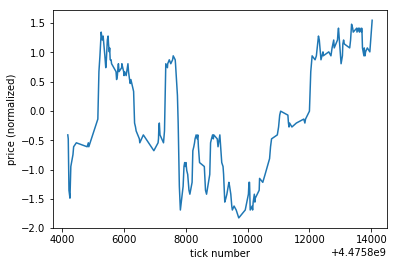

In [5]:
import matplotlib.pyplot as plt
plt.plot(data['x'], data['price'])
plt.ylabel('price (normalized)')
plt.xlabel('tick number')
plt.show()

In [6]:
# Discrete Fourier Transform (DFT)
import random
import math
import cmath
pi2 = cmath.pi * 2.0

def dft(fn_list):
    N = len(fn_list)
    fm_list = []
    for m in range(N):
        fm = 0.0
        for n in range(N):
            fm += fn_list[n] * cmath.exp(- 1j * pi2 * m * n / N)
        fm_list.append(fm / N)
    return fm_list
        
def inverse_dft(fm_list):
    N = len(fm_list)
    fn_list = []
    for n in range(N):
        fn = 0.0
        for m in range(N):
            fn += fm_list[m] * cmath.exp(1j * pi2 * m * n / N)
        fn_list.append(fn)
    return fn_list

In [7]:
dft_data = dft(data['price'])

In [8]:
dft_data[:5]

[(3.1465385852413875e-13+0j),
 (0.51716406047241759-0.026650047952264073j),
 (-0.12872375071236336+0.20337214521619587j),
 (-0.1884573926071568-0.013209485496329956j),
 (-0.046080794670091491+0.01212452548802026j),
 (-0.13843932440502776+0.1288529407247189j),
 (0.03962302791701456+0.084513624191878897j),
 (-0.077350390999124358+0.0065134511744499848j),
 (-0.10131303190508971+0.11144732435112779j),
 (0.060673834321234549+0.084558482818165942j),
 (0.053618251365184534-0.020423235081818883j),
 (-0.039921497531720335+0.10146036159525318j),
 (0.030910476240082963+0.011536384439182257j),
 (0.019604139155313033+0.011312142696732976j),
 (0.037488545810238749+0.045899219995794091j),
 (0.0022386279011951961+0.053994137408080907j),
 (0.013344448952144207-0.01733193382616707j),
 (-0.030217142375917706+0.025908216332571773j),
 (0.059950245170942225+0.0052460343479324937j),
 (-0.02547962010510323+0.00035744356887741245j),
 (-0.0096896096155119973+0.028421768789486528j),
 (-0.011537802224567189+0.017

/home/anatoly/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


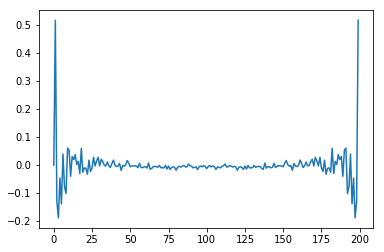

In [9]:
n = len(data['x'])
plt.plot(range(n), dft_data)
plt.show()

In [22]:
def compress(ratio = 0.5):
    """ Compress time series with specified ratio. """
    f_r = ratio if ratio <= 0.5 else 0.5
    index = int(200 * f_r)
    retained_data = [x*2.0 for x in dft_data[0:index]] + [0]*(200-index)
    return retained_data

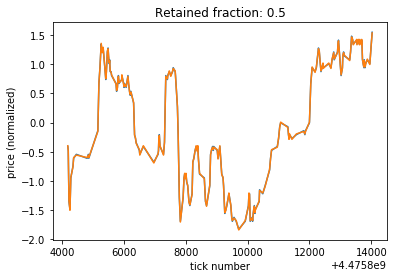

In [23]:
points_back = inverse_dft(compress(ratio = 0.5))
plt.plot(data['x'], data['price'])
plt.plot(data['x'], points_back)
plt.title('Retained fraction: 0.5')
plt.ylabel('price (normalized)')
plt.xlabel('tick number')
plt.show()

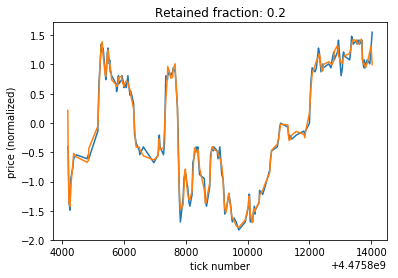

In [24]:
points_back = inverse_dft(compress(ratio = 0.2))
plt.plot(data['x'], data['price'])
plt.plot(data['x'], points_back)
plt.title('Retained fraction: 0.2')
plt.ylabel('price (normalized)')
plt.xlabel('tick number')
plt.show()

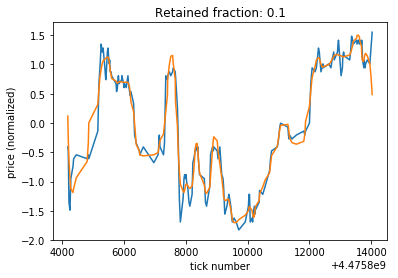

In [25]:
points_back = inverse_dft(compress(ratio = 0.1))
plt.plot(data['x'], data['price'])
plt.plot(data['x'], points_back)
plt.title('Retained fraction: 0.1')
plt.ylabel('price (normalized)')
plt.xlabel('tick number')
plt.show()

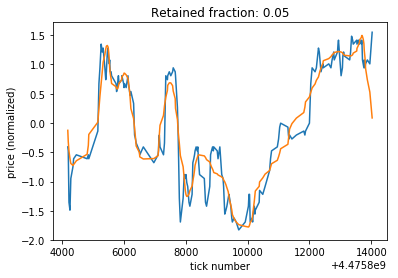

In [26]:
points_back = inverse_dft(compress(ratio = 0.05))
plt.plot(data['x'], data['price'])
plt.plot(data['x'], points_back)
plt.title('Retained fraction: 0.05')
plt.ylabel('price (normalized)')
plt.xlabel('tick number')
plt.show()